# TORN $^2$ Tokenomics Analyzis

In [2]:
import numpy as np
import pandas as pd
import scipy as scp
from matplotlib import pyplot as plt
import os

## Unique Users per Week Deposits

In [11]:
with open('./Data/TornadoCash Unique Users Per Week Deposits.csv') as f:
    UniqueUsers = pd.read_csv(f)

In [19]:
UniqueUsers['time'] = pd.to_datetime(UniqueUsers['time'])

Text(0.5, 1.0, 'Unique Users per Week')

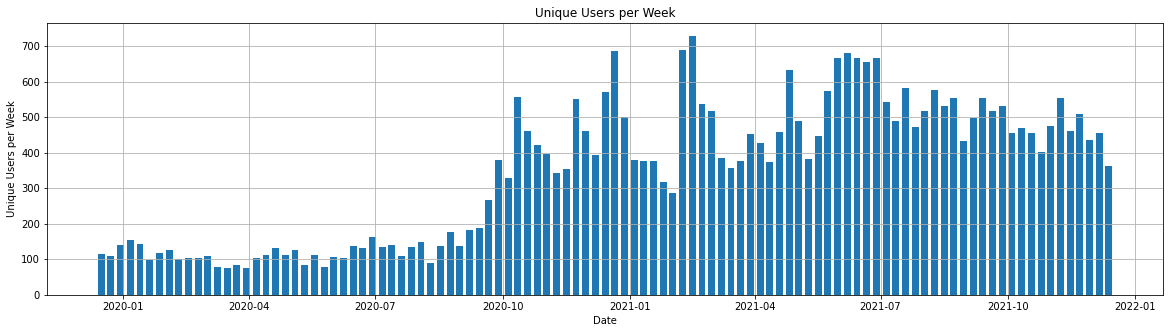

In [26]:
plt.bar(UniqueUsers['time'], UniqueUsers['users'], width=5)
plt.xlabel('Date')
plt.ylabel('Unique Users per Week')
plt.gcf().set_size_inches(20, 5)
plt.grid()
plt.title('Unique Users per Week')

## TVL in Tornado Pools

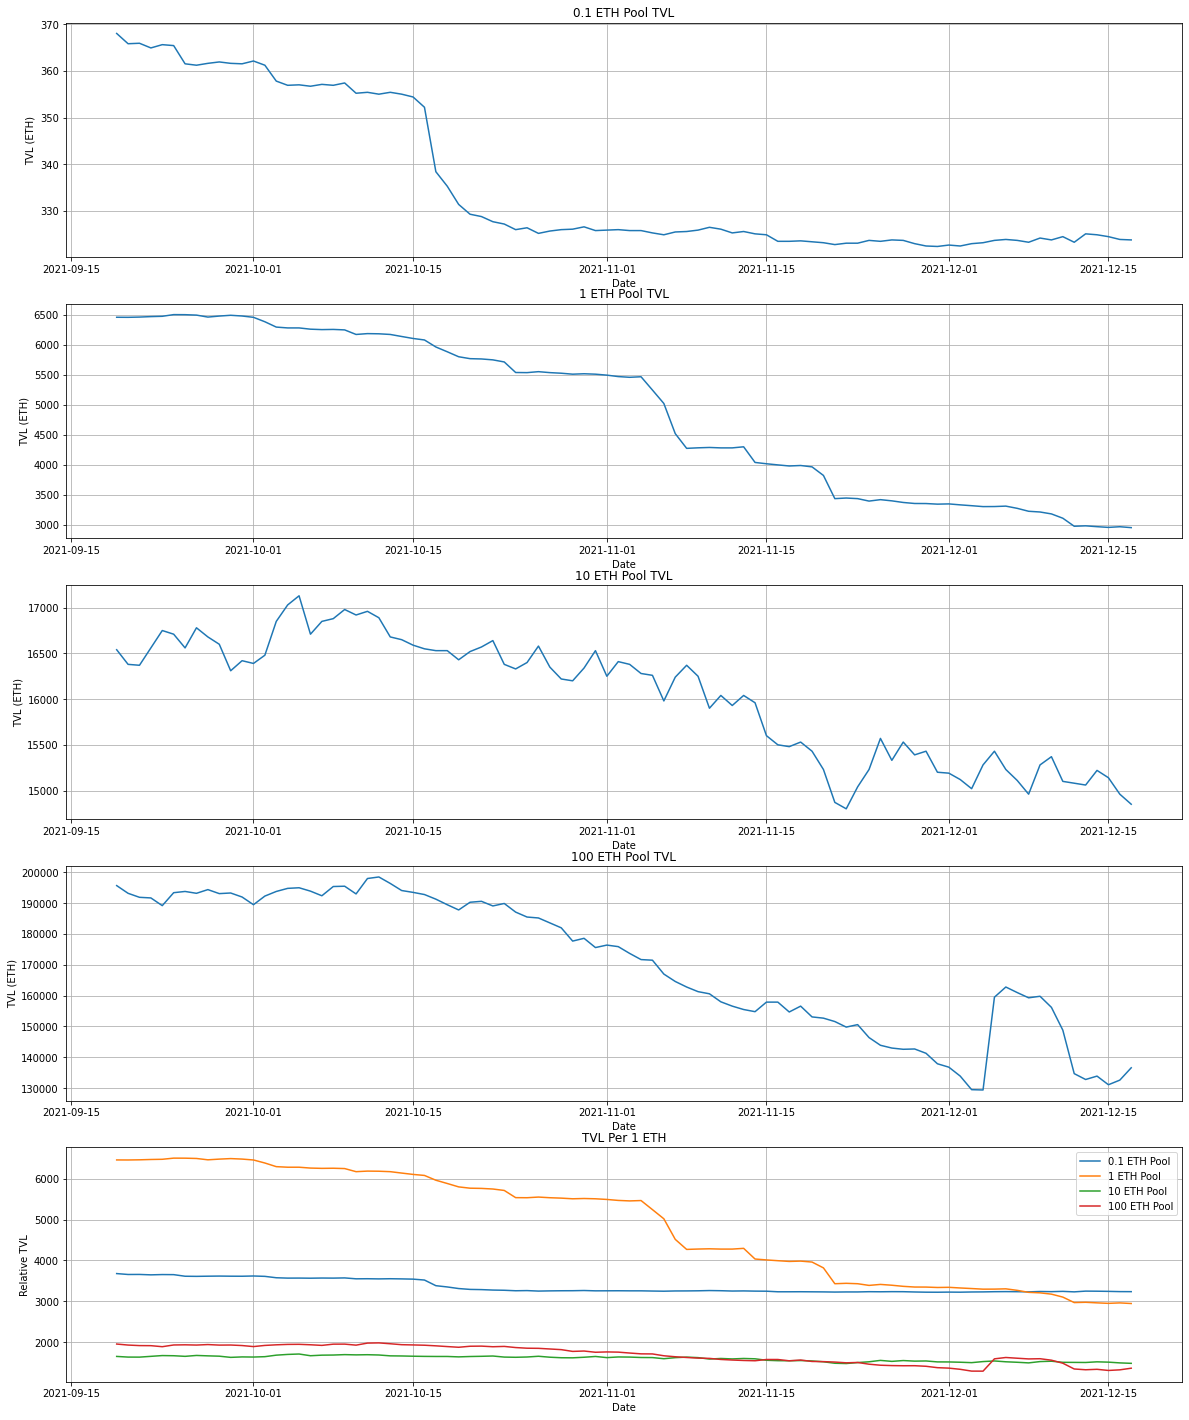

In [78]:
TVL = {}

for file in os.listdir('./Data/TVL'):
    TVL[file.replace(' ETH TVL Daily (90d).csv', '')] = pd.read_csv('./Data/TVL/' + str(file))

i = 0
fig, axes = plt.subplots(len(TVL)+1, 1)
for k in TVL:
    date = pd.to_datetime(TVL[k]['day'])
    tvl = TVL[k]['daily_tvl']
    relative_tvl = tvl/float(k)
    axes[i].plot(date, tvl)#, label='TVL')
    axes[-1].plot(date, relative_tvl, label=k + ' ETH Pool')
    axes[i].set_title(k + ' ETH Pool TVL')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('TVL (ETH)')
    axes[i].grid()

    i += 1

axes[-1].set_title('TVL Per 1 ETH')
axes[-1].set_xlabel('Date')
axes[-1].set_ylabel('Relative TVL')
axes[-1].legend()
axes[-1].grid()

plt.gcf().set_size_inches(20, 25)

## Deposits & Withdrawals

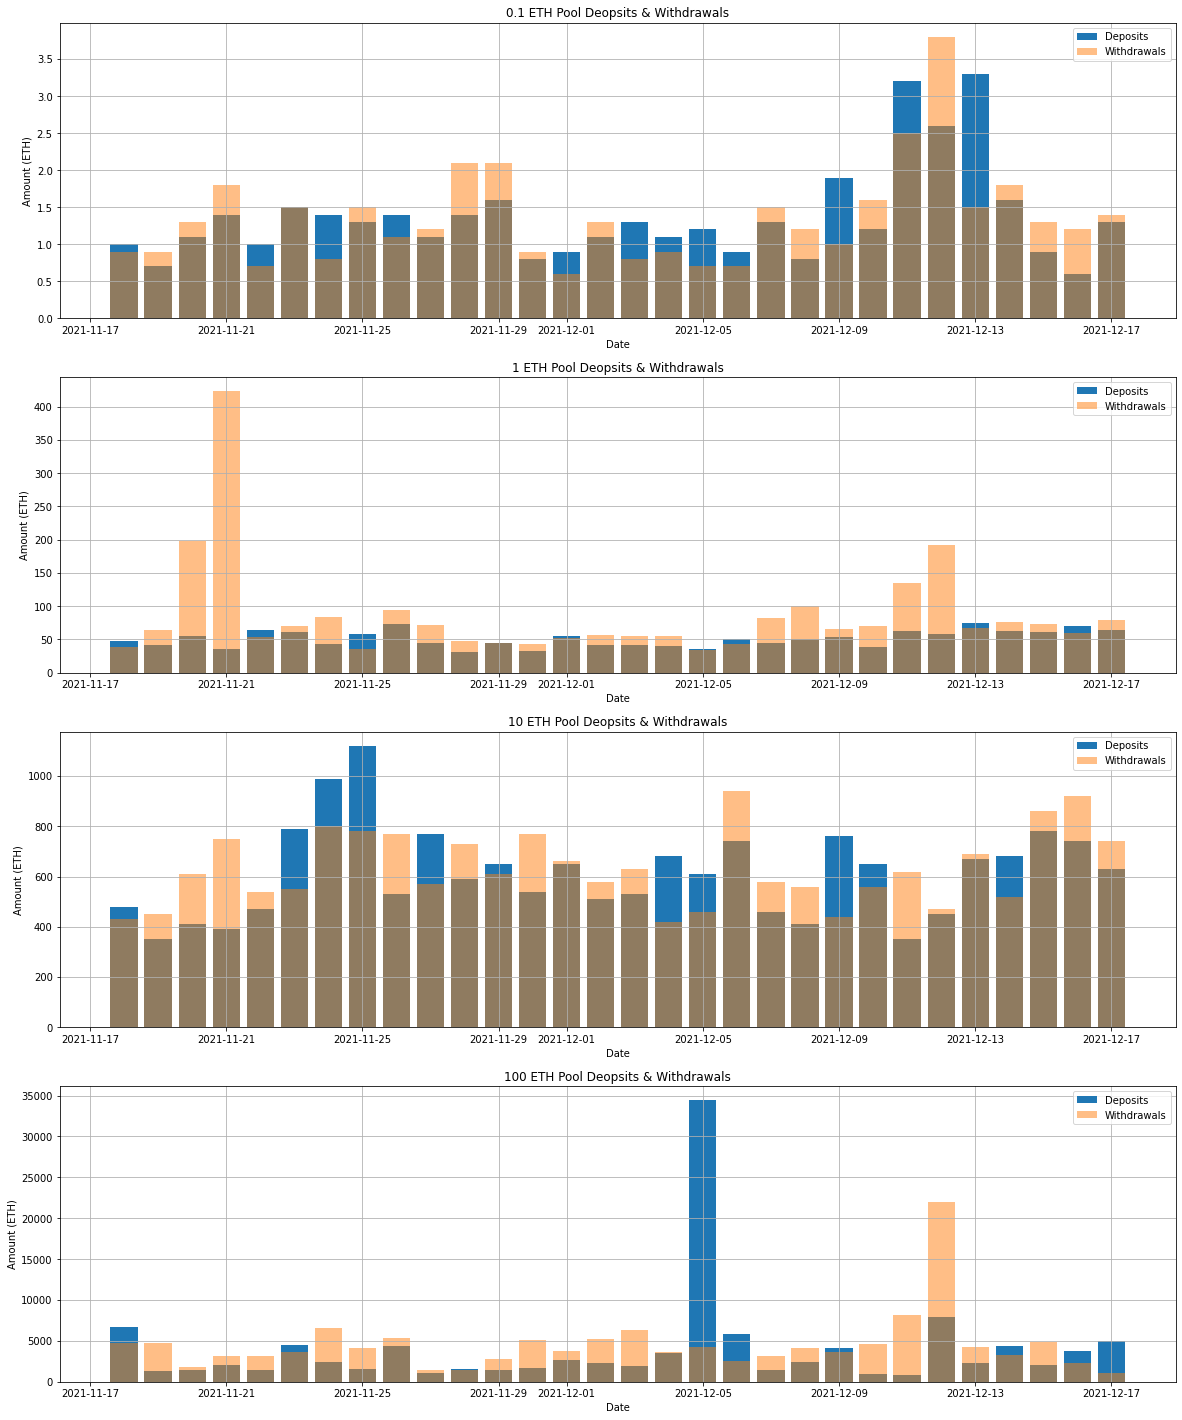

In [107]:
DW = {}

for file in os.listdir('./Data/DepositsWithdrawals'):
    DW[file.replace(' ETH DepositsWithdrawals Daily (30d).csv', '')] = pd.read_csv('./Data/DepositsWithdrawals/' + str(file))

i = 0
fig, axes = plt.subplots(len(DW), 1)
for k in DW:
    date = pd.to_datetime(DW[k]['time'])
    dep = DW[k]['deposits_eth']
    wit = DW[k]['withdrawals_eth']
    axes[i].bar(date, dep, label='Deposits')
    axes[i].bar(date, wit, label='Withdrawals', alpha=0.5)
    #axes[-1].plot(date, relative_tvl, label=k + ' ETH Pool')
    axes[i].set_title(k + ' ETH Pool Deopsits & Withdrawals')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Amount (ETH)')
    axes[i].grid()
    axes[i].legend()

    i += 1

'''axes[-1].set_title('TVL Per 1 ETH')
axes[-1].set_xlabel('Date')
axes[-1].set_ylabel('Relative TVL')
axes[-1].legend()
axes[-1].grid()'''

plt.gcf().set_size_inches(20, 25)

## Fees

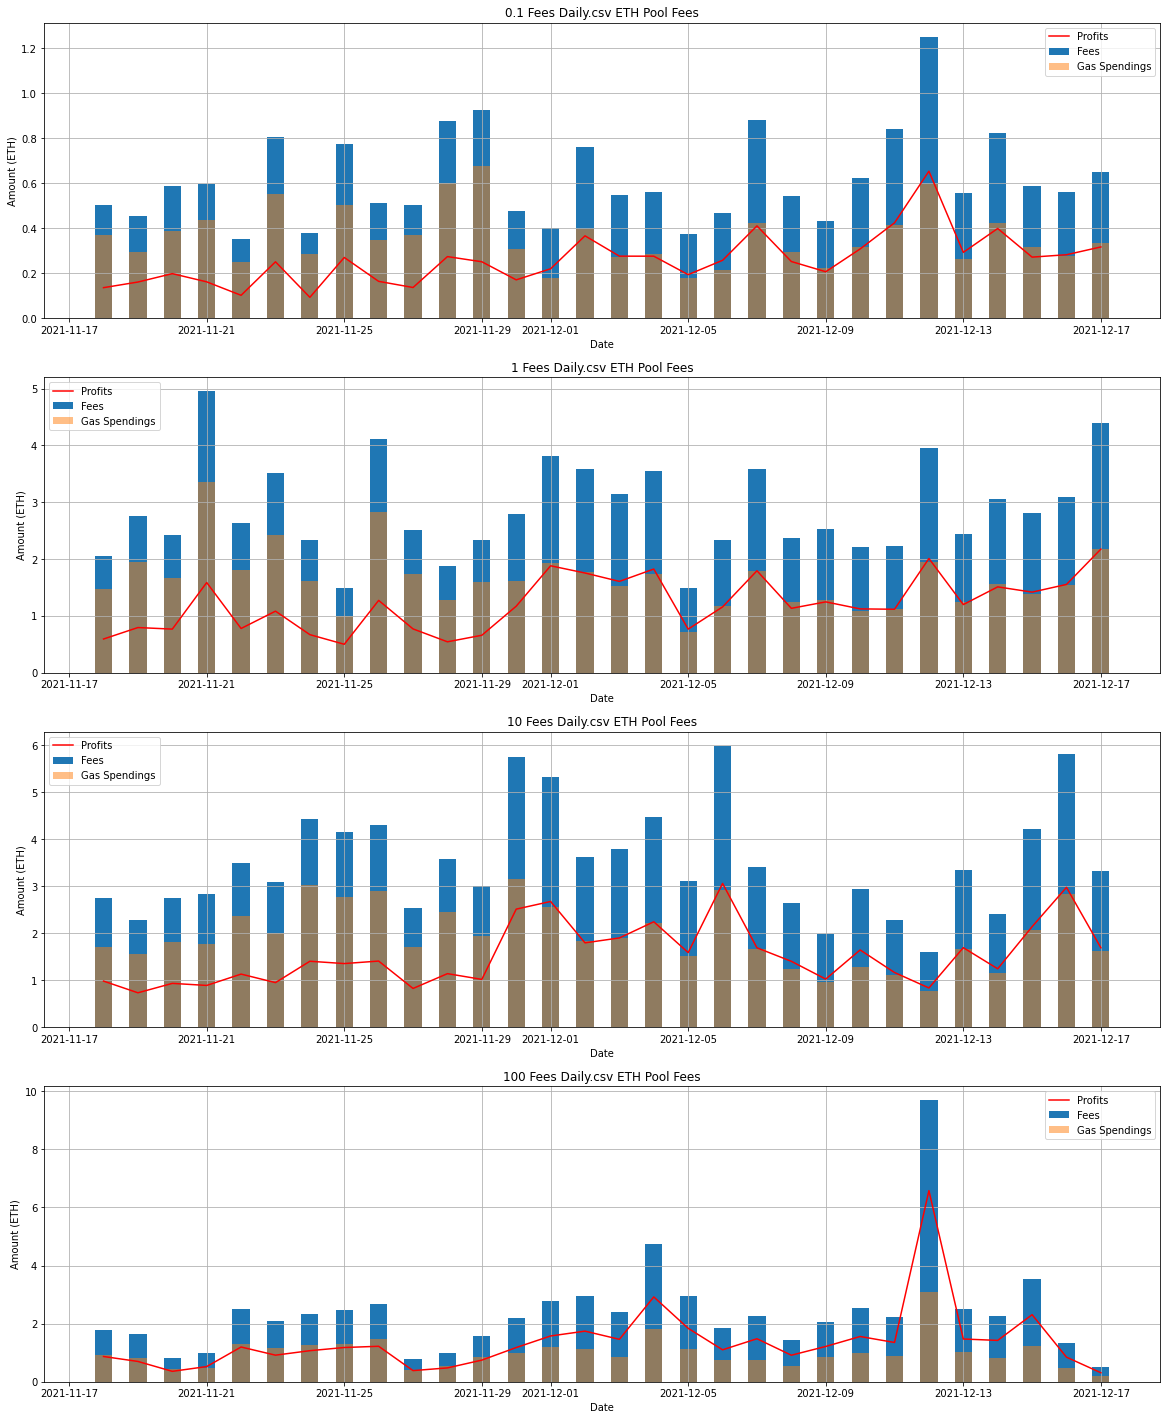

In [139]:
Fees = {}

for file in os.listdir('./Data/Fees'):
    Fees[file.replace(' ETH Fees Daily.csv', '')] = pd.read_csv('./Data/Fees/' + str(file))

for k in Fees:
    Fees[k] = Fees[k][pd.to_datetime(Fees[k]['day']) >= pd.to_datetime('2021-11-18', utc=True)]
    Fees[k] = Fees[k][pd.to_datetime(Fees[k]['day']) <= pd.to_datetime('2021-12-17', utc=True)]

i = 0
fig, axes = plt.subplots(len(Fees), 1)
for k in Fees:
    date = pd.to_datetime(Fees[k]['day'])
    fees = Fees[k]['relayer_total_fee_eth']
    gas = Fees[k]['relayer_gas_cost_eth']
    profits = fees - gas
    profits2 = Fees[k]['relayer_profit_eth']
    axes[i].bar(date, fees, label='Fees', width=0.5)
    axes[i].bar(date, gas, label='Gas Spendings', alpha=0.5, width=0.5)
    #axes[i].plot(date, profits, label='Profits', color='yellow', alpha=1)
    axes[i].plot(date, profits2, label='Profits', color='red')
    #axes[-1].plot(date, relative_tvl, label=k + ' ETH Pool')
    axes[i].set_title(k + ' ETH Pool Fees')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Amount (ETH)')
    axes[i].grid()
    axes[i].legend()

    i += 1

'''axes[-1].set_title('TVL Per 1 ETH')
axes[-1].set_xlabel('Date')
axes[-1].set_ylabel('Relative TVL')
axes[-1].legend()
axes[-1].grid()'''

plt.gcf().set_size_inches(20, 25)

## TORN Circulating Supply

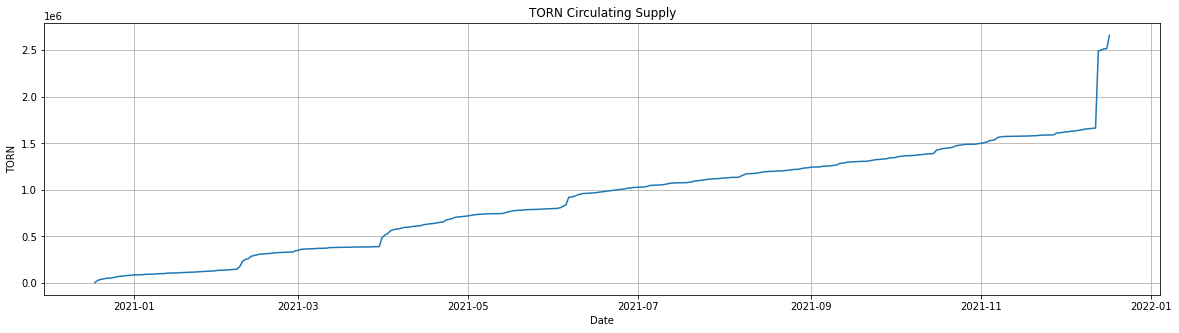

In [33]:
with open('./Data/TORN Circulating Supply v03.csv') as file:
    CS = pd.read_csv(file)

plt.plot(pd.to_datetime(CS['day']), CS['Circulating Supply'])
plt.title('TORN Circulating Supply')
plt.xlabel('Date')
plt.ylabel('TORN')
plt.grid()
plt.gcf().set_size_inches(20, 5)

## TORN Locked in Governance

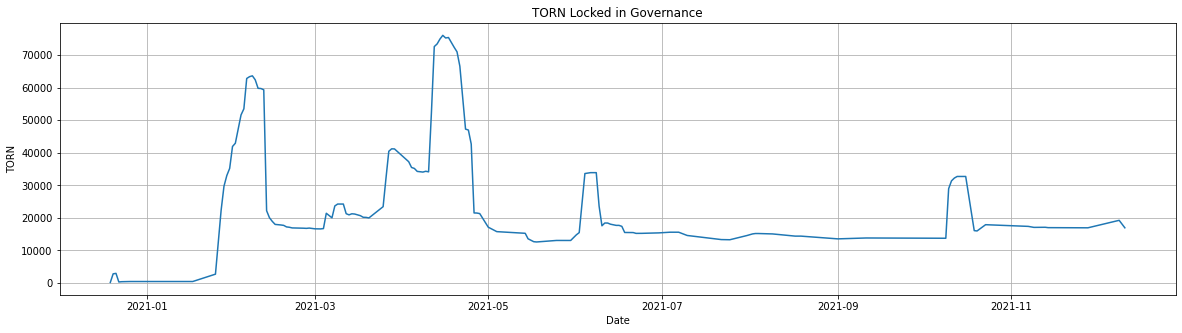

In [62]:
with open('./Data/TORN locked in governance - daily v01.csv') as file:
    TGov = pd.read_csv(file)

plt.plot(pd.to_datetime(TGov['day']), TGov['amount'])
plt.title('TORN Locked in Governance')
plt.xlabel('Date')
plt.ylabel('TORN')
plt.grid()
plt.gcf().set_size_inches(20, 5)

## TORN Price

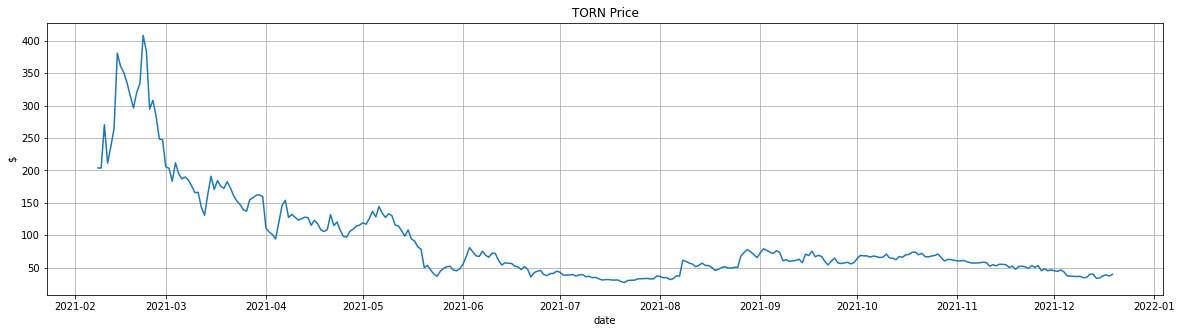

In [92]:
with open('./Data/TORN Price.csv') as file:
    TORN_Price = pd.read_csv(file)

TORN_Price = TORN_Price.rename(columns={'snapped_at':'date'})
TORN_Price['date'] = pd.to_datetime(TORN_Price['date'])

plt.plot(TORN_Price['date'], TORN_Price['price'])
plt.title('TORN Price')
plt.xlabel('date')
plt.ylabel('$')
plt.grid()
plt.gcf().set_size_inches(20, 5)

## ETH Price

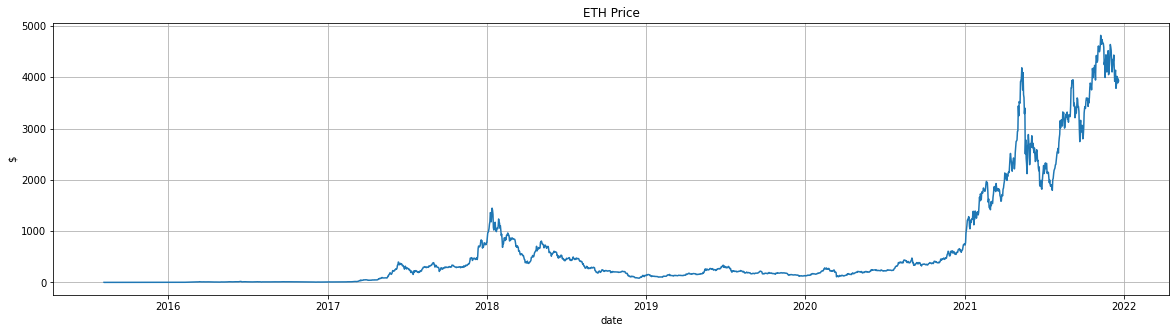

In [202]:
with open('./Data/ETH Price.csv') as file:
    ETH_Price = pd.read_csv(file)

ETH_Price = ETH_Price.rename(columns={'snapped_at':'date'})
ETH_Price['date'] = pd.to_datetime(ETH_Price['date'])

plt.plot(ETH_Price['date'], ETH_Price['price'])
plt.title('ETH Price')
plt.xlabel('date')
plt.ylabel('$')
plt.grid()
plt.gcf().set_size_inches(20, 5)

## Cutting data from 2021-11-18

In [115]:
start_date = pd.to_datetime('2021-11-18', utc=True)
end_date = pd.to_datetime('2021-12-17', utc=True)

In [216]:
with open('./Data/TORN Price.csv') as torn_file, open('./Data/ETH Price.csv') as eth_file:
    TORN_price = pd.read_csv(torn_file).rename(columns={'price':'torn'})
    ETH_price = pd.read_csv(eth_file).rename(columns={'price':'eth'})
    Price = ETH_price.merge(TORN_price, on='snapped_at')[['snapped_at', 'eth', 'torn']].rename(columns={'snapped_at':'date'})
    Price['date'] = pd.to_datetime(Price['date'])
    Price = Price[(Price['date'] >= start_date) & (Price['date'] <= end_date)].sort_values(by='date').reset_index(drop=True)

Price.head()

,date,eth,torn
0,2021-11-18 00:00:00+00:00,4302.804959,52.291352
1,2021-11-19 00:00:00+00:00,3993.846595,47.584078
2,2021-11-20 00:00:00+00:00,4317.603196,51.730625
3,2021-11-21 00:00:00+00:00,4436.192767,52.273045
4,2021-11-22 00:00:00+00:00,4319.361567,51.279406


In [217]:
DW = {}
for file in os.listdir('./Data/DepositsWithdrawals'):
    DW[file.replace(' ETH DepositsWithdrawals Daily (30d).csv', '')] = pd.read_csv('./Data/DepositsWithdrawals/' + str(file))

for k in DW:
    DW[k]['time'] = pd.to_datetime(DW[k]['time'])
    DW[k] = DW[k].rename(columns={'time': 'date'})
    DW[k] = DW[k][(DW[k]['date'] >= start_date) & (DW[k]['date'] <= end_date)].sort_values(by='date').reset_index(drop=True)

DW['1'].head()

,date,deposits_eth,withdrawals_eth,deposits,withdrawals
0,2021-11-18 00:00:00+00:00,47.0,39.0,196082.29,164011.81
1,2021-11-19 00:00:00+00:00,41.0,64.0,173111.67,266346.41
2,2021-11-20 00:00:00+00:00,55.0,198.0,238146.60,855241.16
3,2021-11-21 00:00:00+00:00,36.0,423.0,156731.48,1843905.26
4,2021-11-22 00:00:00+00:00,64.0,54.0,267344.25,226380.84


In [218]:
Fees = {}
for file in os.listdir('./Data/Fees'):
    Fees[file.replace(' Fees Daily.csv', '')] = pd.read_csv('./Data/Fees/' + str(file))
    
for k in Fees:
    Fees[k]['day'] = pd.to_datetime(Fees[k]['day'])
    Fees[k] = Fees[k].rename(columns={'day' : 'date'})
    Fees[k] = Fees[k][(Fees[k]['date'] >= start_date) & (Fees[k]['date'] <= end_date)]
    Fees[k] = Fees[k].sort_values(by='date').reset_index(drop=True)

Fees['1'].head()

,date,relayer_total_fee_eth,relayer_gas_cost_eth,relayer_profit_eth,relayer_total_fee_usd,relayer_gas_cost_usd,relayer_profit_usd
0,2021-11-18 00:00:00+00:00,2.060641,1.466777,0.593864,8649.973065,6153.825257,2496.147808
1,2021-11-19 00:00:00+00:00,2.750785,1.955174,0.795611,11517.642453,8188.016354,3329.626099
2,2021-11-20 00:00:00+00:00,2.430172,1.661809,0.768363,10486.418866,7168.591091,3317.827775
3,2021-11-21 00:00:00+00:00,4.951835,3.364282,1.587553,21595.663497,14671.851990,6923.811507
4,2021-11-22 00:00:00+00:00,2.639466,1.803960,0.779281,11046.419232,7550.512293,3261.915211


To determine the quantities of TORN token required to perform a withdrawal, let's calculate the profitability of the relayer as a percentage of total withdrawal amount:

$$
Profit = \frac{\sum{profits}}{\sum{withdrawals}}\times 100\%
$$

Based on this metric we can derive what percentage of the profit will be converted into $TORN$ staked back into $TORN$ pool by the Relayers:

$$
TORN = Profit \times A \%
$$

We can analyze for different $A$ and obtain the buying pressure of the $TORN$ token in the outer market, the TVL growth of the $TORN$ pool and the APR of $TORN$ stakers.

In [219]:
for k in Fees:
    k_profit = Fees[k]['relayer_profit_eth'].sum() / DW[k]['withdrawals_eth'].sum()
    print(k + ' ETH Pool Relayer Profit = {}%'.format(k_profit*100))

0.1 ETH Pool Relayer Profit = 19.152471210803885%
1 ETH Pool Relayer Profit = 1.420402888454761%
10 ETH Pool Relayer Profit = 0.24232959000598575%
100 ETH Pool Relayer Profit = 0.03020600676676755%


It is also interesting to see the spendings of the user withdrawing funds:

In [220]:
for k in Fees:
    k_profit = Fees[k]['relayer_total_fee_eth'].sum() / DW[k]['withdrawals_eth'].sum()
    print(k + ' ETH Pool Relayer Fees = {}%'.format(k_profit*100))

0.1 ETH Pool Relayer Fees = 45.85143295733881%
1 ETH Pool Relayer Fees = 3.363556057890783%
10 ETH Pool Relayer Fees = 0.5536110973172016%
100 ETH Pool Relayer Fees = 0.0523502920740059%


We see the distribution of Relayers' profits per single withdrawal based on the withdrawal size.

Turns out the 0.1 ETH pool is the most expensive one.

Let's start with conservative $A$ of $20 \%$ (i.e. $20 \%$ of Relayers' profits actually be the necessary TORN deposit in the Vault).

The initial TORN Pool will consist of those tokens locked in governance at the moment:

In [280]:
with open('./data/TORN locked in governance - addresses v01.csv') as file:
    GOV = pd.read_csv(file)

init_TORN = GOV['amount'].sum()
init_TORN

22769

In [333]:
A = 0.05

TORN_pool = pd.DataFrame()
TORN_pool['torn'] = np.ones(len(Price)) * init_TORN
TORN_pool['torn_deposit'] = np.zeros(len(Price))
TORN_pool['date'] = Price['date']

for k in Fees:
    Fees[k]['torn_required'] = Fees[k]['relayer_profit_eth'] * A * Price['eth'] / Price['torn']
    TORN_pool['torn_deposit'] += Fees[k]['torn_required']

for i in range(len(TORN_pool)):
    TORN_pool.loc[i, 'torn'] += TORN_pool[TORN_pool['date'] <= TORN_pool.loc[i, 'date']]['torn_deposit'].sum()

TORN_pool

,torn,torn_deposit,date
0,22779.628598,10.628598,2021-11-18 00:00:00+00:00
1,22789.662158,10.033560,2021-11-19 00:00:00+00:00
2,22799.094769,9.432611,2021-11-20 00:00:00+00:00
3,22812.521603,13.426834,2021-11-21 00:00:00+00:00
4,22826.042417,13.520814,2021-11-22 00:00:00+00:00
5,22839.480474,13.438057,2021-11-23 00:00:00+00:00
6,22852.769664,13.289190,2021-11-24 00:00:00+00:00
7,22866.726080,13.956416,2021-11-25 00:00:00+00:00
8,22884.047193,17.321113,2021-11-26 00:00:00+00:00
9,22893.519762,9.472569,2021-11-27 00:00:00+00:00


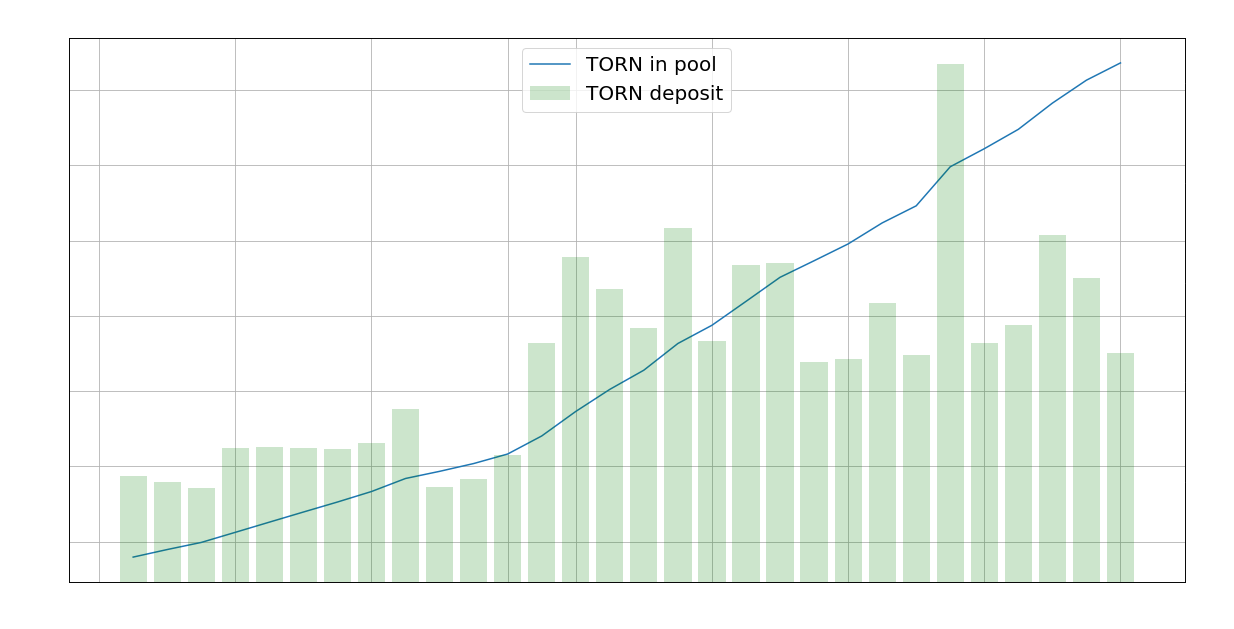

In [343]:
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
a = plt.plot(TORN_pool['date'], TORN_pool['torn'], label='TORN in pool')
plt.title('TORN Pool Composition', fontsize=32)
plt.xlabel('Date', fontsize=20)
plt.ylabel('TORN', fontsize=20)
plt.grid()
plt.twinx()
b = plt.bar(TORN_pool['date'], TORN_pool['torn_deposit'], alpha=0.2, color='green', width=0.8, label='TORN deposit')
plt.ylabel('TORN Deposit', fontsize=20)
plt.gcf().set_size_inches(20, 10)
l = [a[0], b]
labels = [x.get_label() for x in l]
plt.rcParams['text.color'] = 'black'
plt.legend(l, labels, fontsize=20, loc=9)


In [335]:
final_TORN = TORN_pool.iloc[-1]['torn']

gain = final_TORN - init_TORN
rate = gain/init_TORN
apr = rate / 30 * 365
apr

0.3564438100883016

In [344]:
final_TORN

23436.057735224702